In [16]:
import pandas as pd

# Corrected path: Enclose the file path in quotes
data = pd.read_csv("data/Data_Negara_HELP.csv")

# Display the first few rows of the data
data.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [22]:
# 1. Checking for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
Cluster             0
dtype: int64


In [24]:
# 3. Drop 'Negara' column (since it's categorical and we don't need it for clustering)
X = data.drop(columns=['Negara'])


In [25]:
from sklearn.preprocessing import StandardScaler

# 4. Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


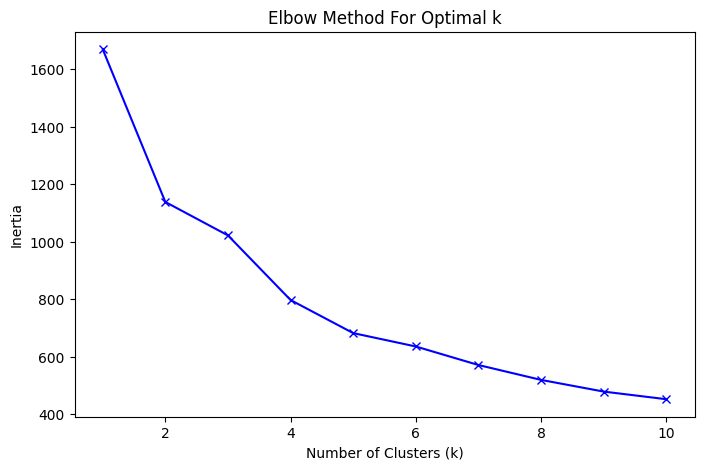

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 5. Using the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
# 6. Clustering using KMeans with the optimal number of clusters
optimal_k = 3  # Assuming from the Elbow Method that 3 is optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [28]:
# 7. Display the cluster assignments
print(data[['Negara', 'Cluster']].head())

                Negara  Cluster
0          Afghanistan        0
1              Albania        0
2              Algeria        0
3               Angola        0
4  Antigua and Barbuda        1


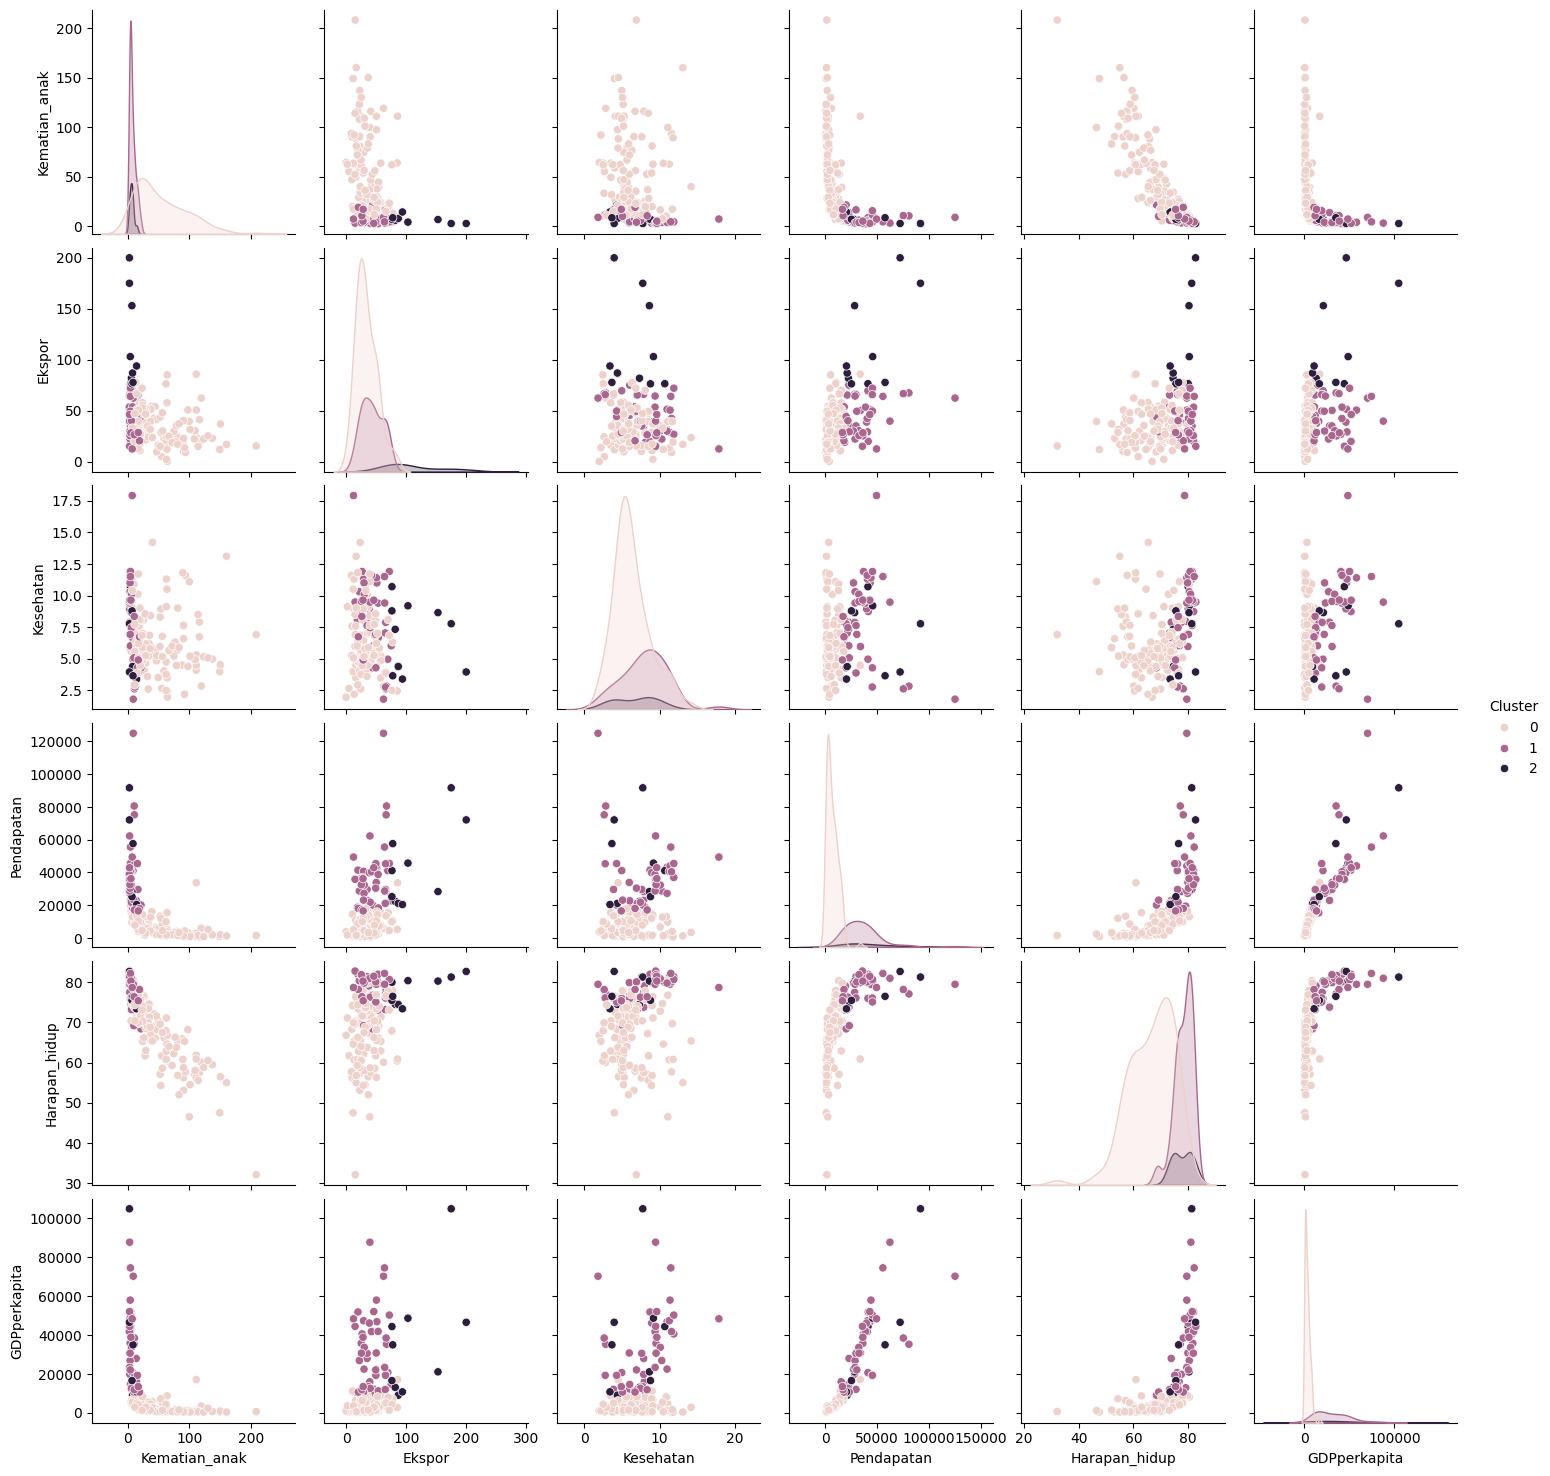

In [29]:
import seaborn as sns

# 8. Visualizing the clusters using a pair plot (for numerical columns only)
sns.pairplot(data, hue='Cluster', vars=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Pendapatan', 'Harapan_hidup', 'GDPperkapita'])
plt.show()

                Negara  Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
0          Afghanistan           90.2    10.0       7.58   44.9        1610   
1              Albania           16.6    28.0       6.55   48.6        9930   
2              Algeria           27.3    38.4       4.17   31.4       12900   
3               Angola          119.0    62.3       2.85   42.9        5900   
4  Antigua and Barbuda           10.3    45.5       6.03   58.9       19100   

   Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
0     9.44           56.2              5.82           553  
1     4.49           76.3              1.65          4090  
2    16.10           76.5              2.89          4460  
3    22.40           60.1              6.16          3530  
4     1.44           76.8              2.13         12200  

Missing Values:
 Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi        

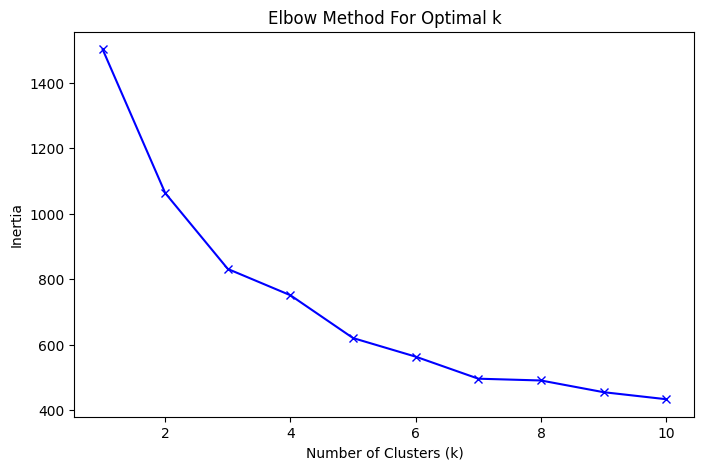

                Negara  Cluster
0          Afghanistan        2
1              Albania        0
2              Algeria        0
3               Angola        2
4  Antigua and Barbuda        0
         Kematian_anak     Ekspor  Kesehatan      Impor    Pendapatan  \
Cluster                                                                 
0            22.456977  40.273128   6.251047  47.362394  12321.744186   
1             5.000000  58.738889   8.807778  51.491667  45672.222222   
2            95.106667  28.602444   6.301111  42.306667   3539.844444   

           Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Cluster                                                            
0         7.720884      72.566279          2.340349   6461.767442  
1         2.671250      80.127778          1.752778  42494.444444  
2        11.986778      59.055556          5.065333   1766.711111  


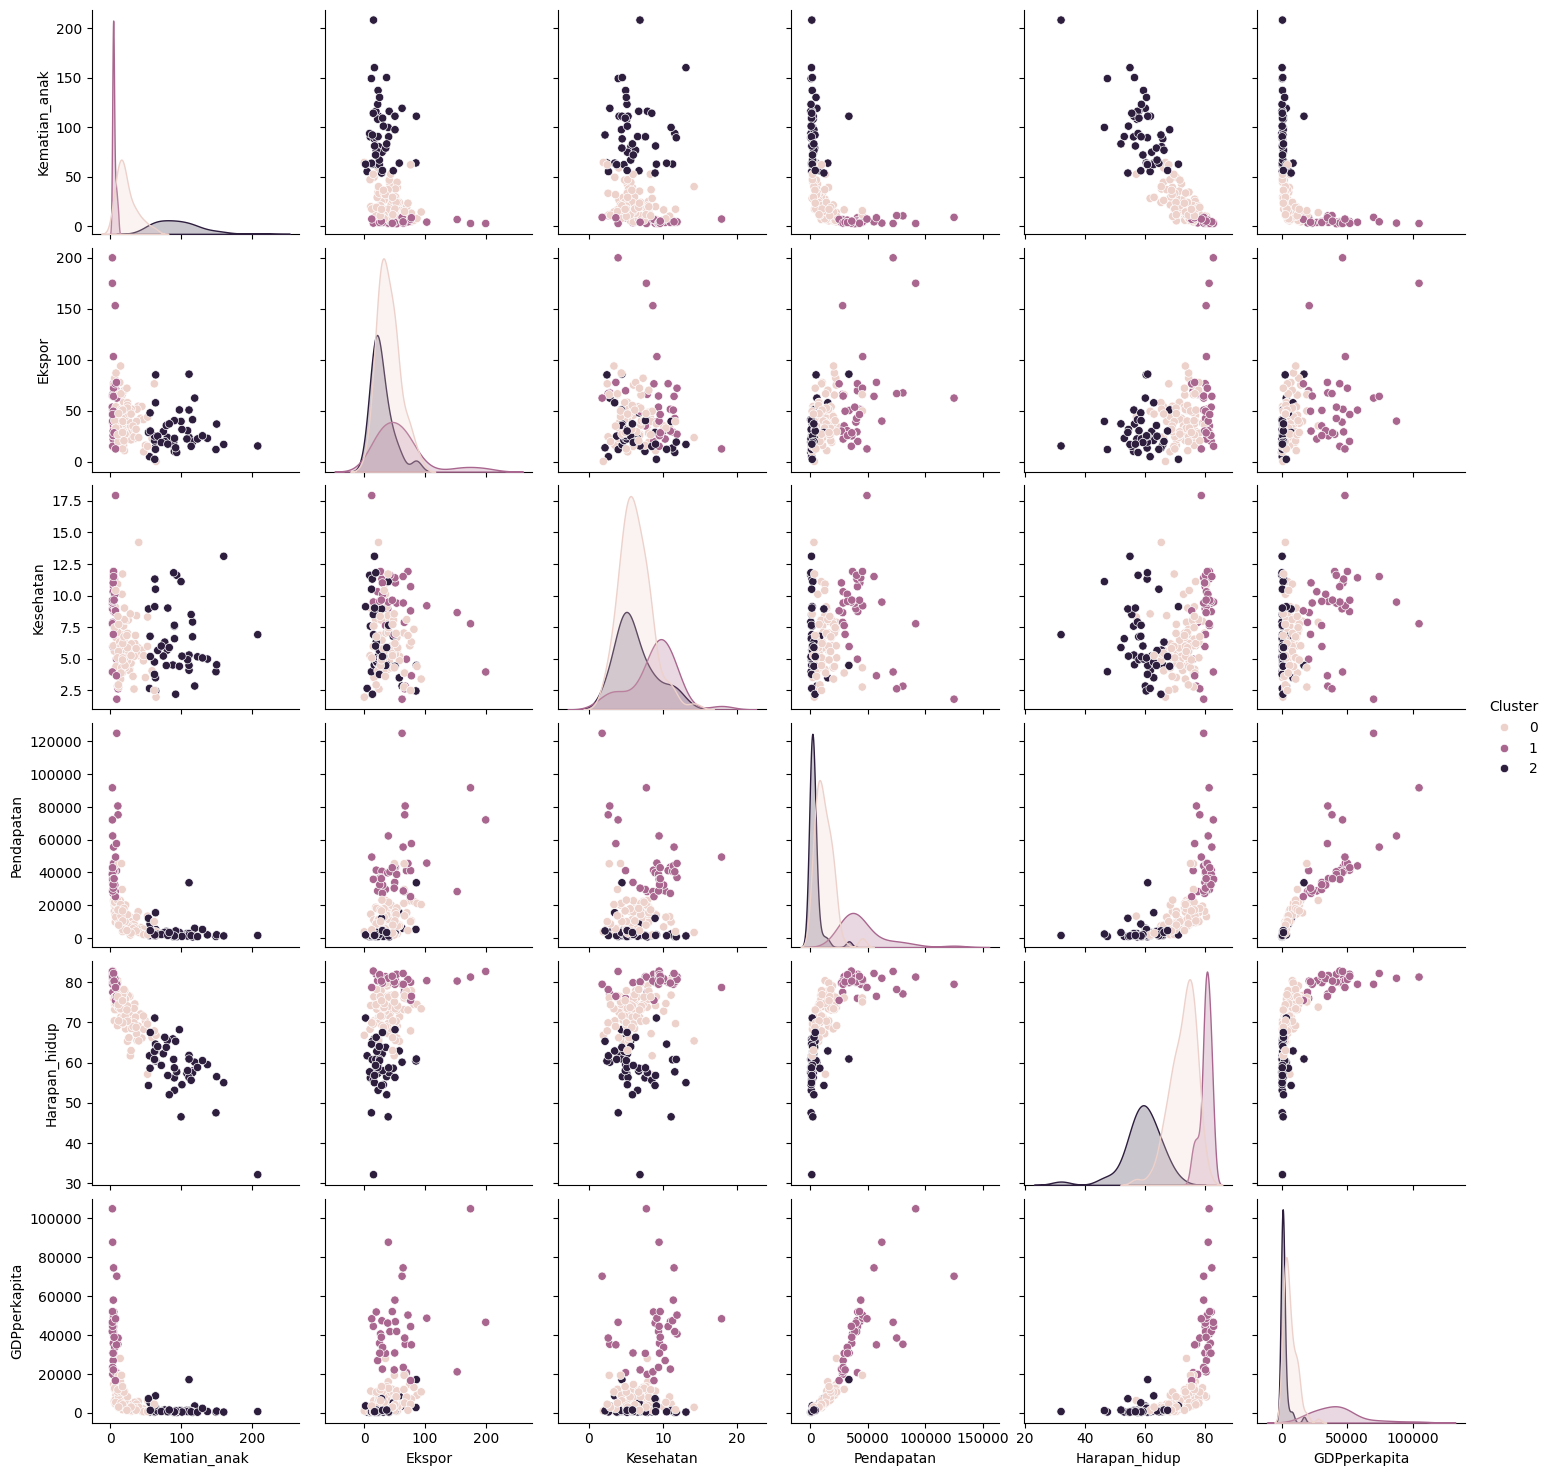

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memuat Data dan Menampilkan Baris Pertama
data = pd.read_csv("data/Data_Negara_HELP.csv")
print(data.head())

# 2. Memeriksa Missing Values
print("\nMissing Values:\n", data.isnull().sum())

# 3. Menangani Missing Values
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# 4. Menghapus Kolom Kategorikal
X = data.drop(columns=['Negara'])

# 5. Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Menggunakan Metode Elbow untuk Menentukan Jumlah Klaster
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# 7. Clustering Menggunakan KMeans
optimal_k = 3  # Misalkan dari Metode Elbow, kita menemukan 3 sebagai optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# 8. Menampilkan Hasil Klaster
print(data[['Negara', 'Cluster']].head())

# 9. Ringkasan Statistik untuk Setiap Kluster
print(data.groupby('Cluster')[numeric_columns].mean())

# 10. Visualisasi Hasil Klaster
sns.pairplot(data, hue='Cluster', vars=['Kematian_anak', 'Ekspor', 'Kesehatan', 'Pendapatan', 'Harapan_hidup', 'GDPperkapita'])
plt.show()


In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# Memuat Data
data = pd.read_csv("data/Data_Negara_HELP.csv")

# Menangani Missing Values
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Normalisasi Data
X = data.drop(columns=['Negara'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering Menggunakan KMeans
optimal_k = 3  # Jumlah kluster yang ditentukan
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Menyimpan model scaler dan model KMeans
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(kmeans, 'kmeans_model.joblib')

# Menampilkan informasi model yang disimpan
print("Model scaler dan KMeans telah disimpan.")

Model scaler dan KMeans telah disimpan.
